# Thresholding


Thresholding is a basic technique used in image processing and computer vision to separate objects or regions of interest from the background in a binary manner. It involves converting a grayscale or color image into a binary image, where each pixel is classified as either foreground (object) or background based on a predefined threshold value.


The threshold value determines the point at which a pixel is considered to be part of the foreground or background. The process of thresholding involves comparing each pixel's intensity or color value with the threshold value and assigning it a binary value accordingly.



Here's a general overview of how thresholding works:

1. **Grayscale Conversion:** If the input image is not already in grayscale format, it is typically converted to grayscale to simplify the thresholding process. This is done by calculating the average intensity or applying a weighted sum of the color channels.

2. **Selection of Thresholding Method:** There are various thresholding methods available, each with its own characteristics and suitability for different types of images. Some common methods include global thresholding, adaptive thresholding, and Otsu's method. The choice of method depends on the characteristics of the image and the desired outcome.

3. **Determining the Threshold Value:** The threshold value can be determined automatically using certain algorithms, or it can be set manually based on prior knowledge of the image content. Automatic methods analyze the image histogram to find an optimal threshold value that separates foreground and background regions effectively.

4. **Pixel Classification:** Each pixel in the image is compared with the threshold value. If the pixel intensity is greater than the threshold, it is assigned the value of the foreground (usually represented as white or 1), indicating that it belongs to the object. If the intensity is below the threshold, it is assigned the value of the background (usually represented as black or 0).

5. **Post-processing:** After thresholding, post-processing steps can be applied to refine the binary image further. These steps may include noise removal, morphological operations (such as erosion or dilation), or connected component analysis to remove small artifacts or merge nearby regions.

>**Note:**  
> Usually the image that is used in thresholding is the result of previous image enhancement, such as histogram equalization, fourier transform, etc. Therefore, the image will be a high contrast, good quality image. This is done so as to maximise the accuracy of finding the RoI (region of interest).

Performing thresholding on images makes it easier for other detection algorithms such as hough transform, canny edge detection etc to identify RoIs


## Code:

In [4]:
!pip install opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 26.8 MB/s eta 0:00:0000:0100:01


In [6]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 57.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 62.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 6.6 MB/s eta 0:00:00


In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [11]:
image_path='Images/lena.png'

### Simple Thresholding


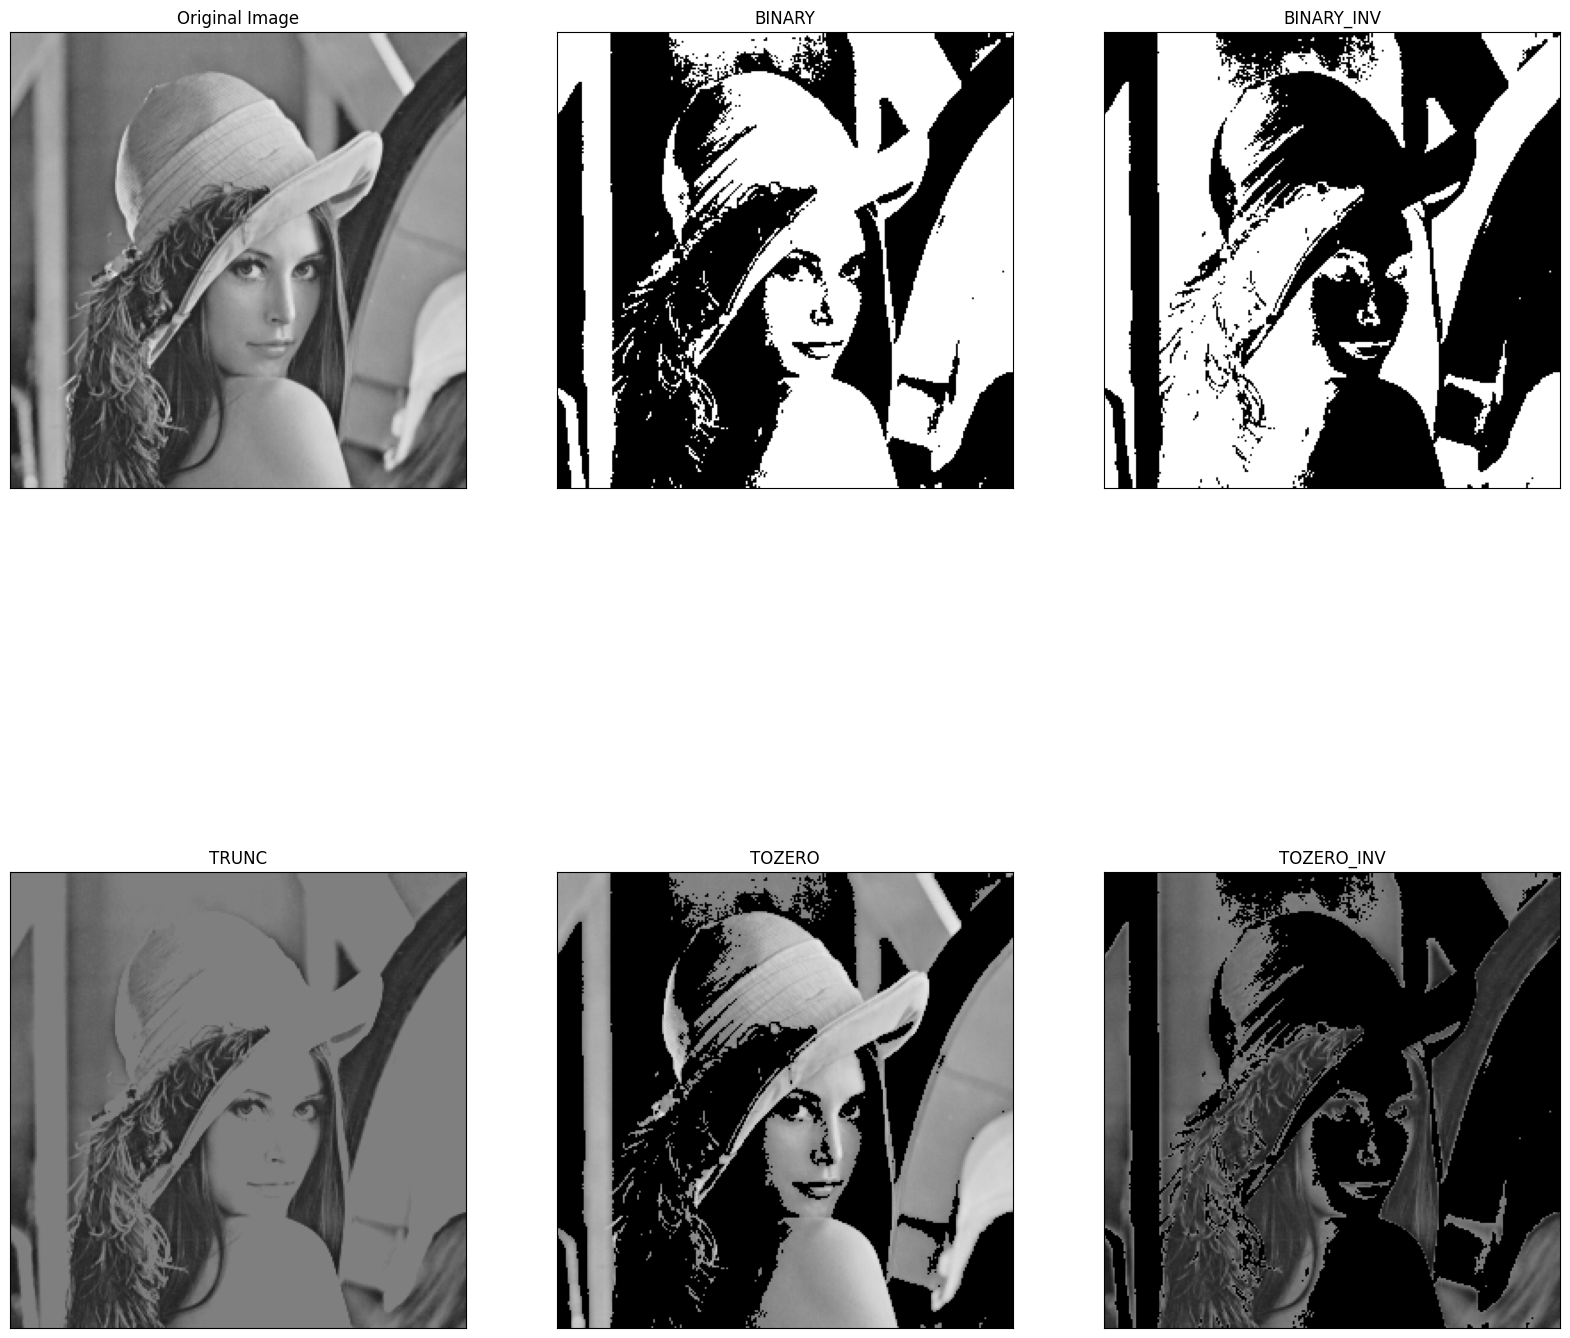

In [12]:
plt.figure(figsize=(20, 20))
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Thresholding


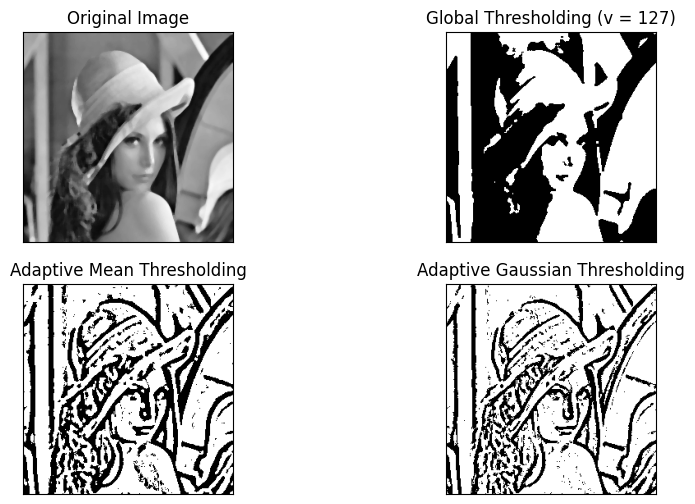

In [13]:
plt.figure(figsize=(10, 6))
from matplotlib import pyplot as plt
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


### Otsu's Binarization 
Used for noisy images


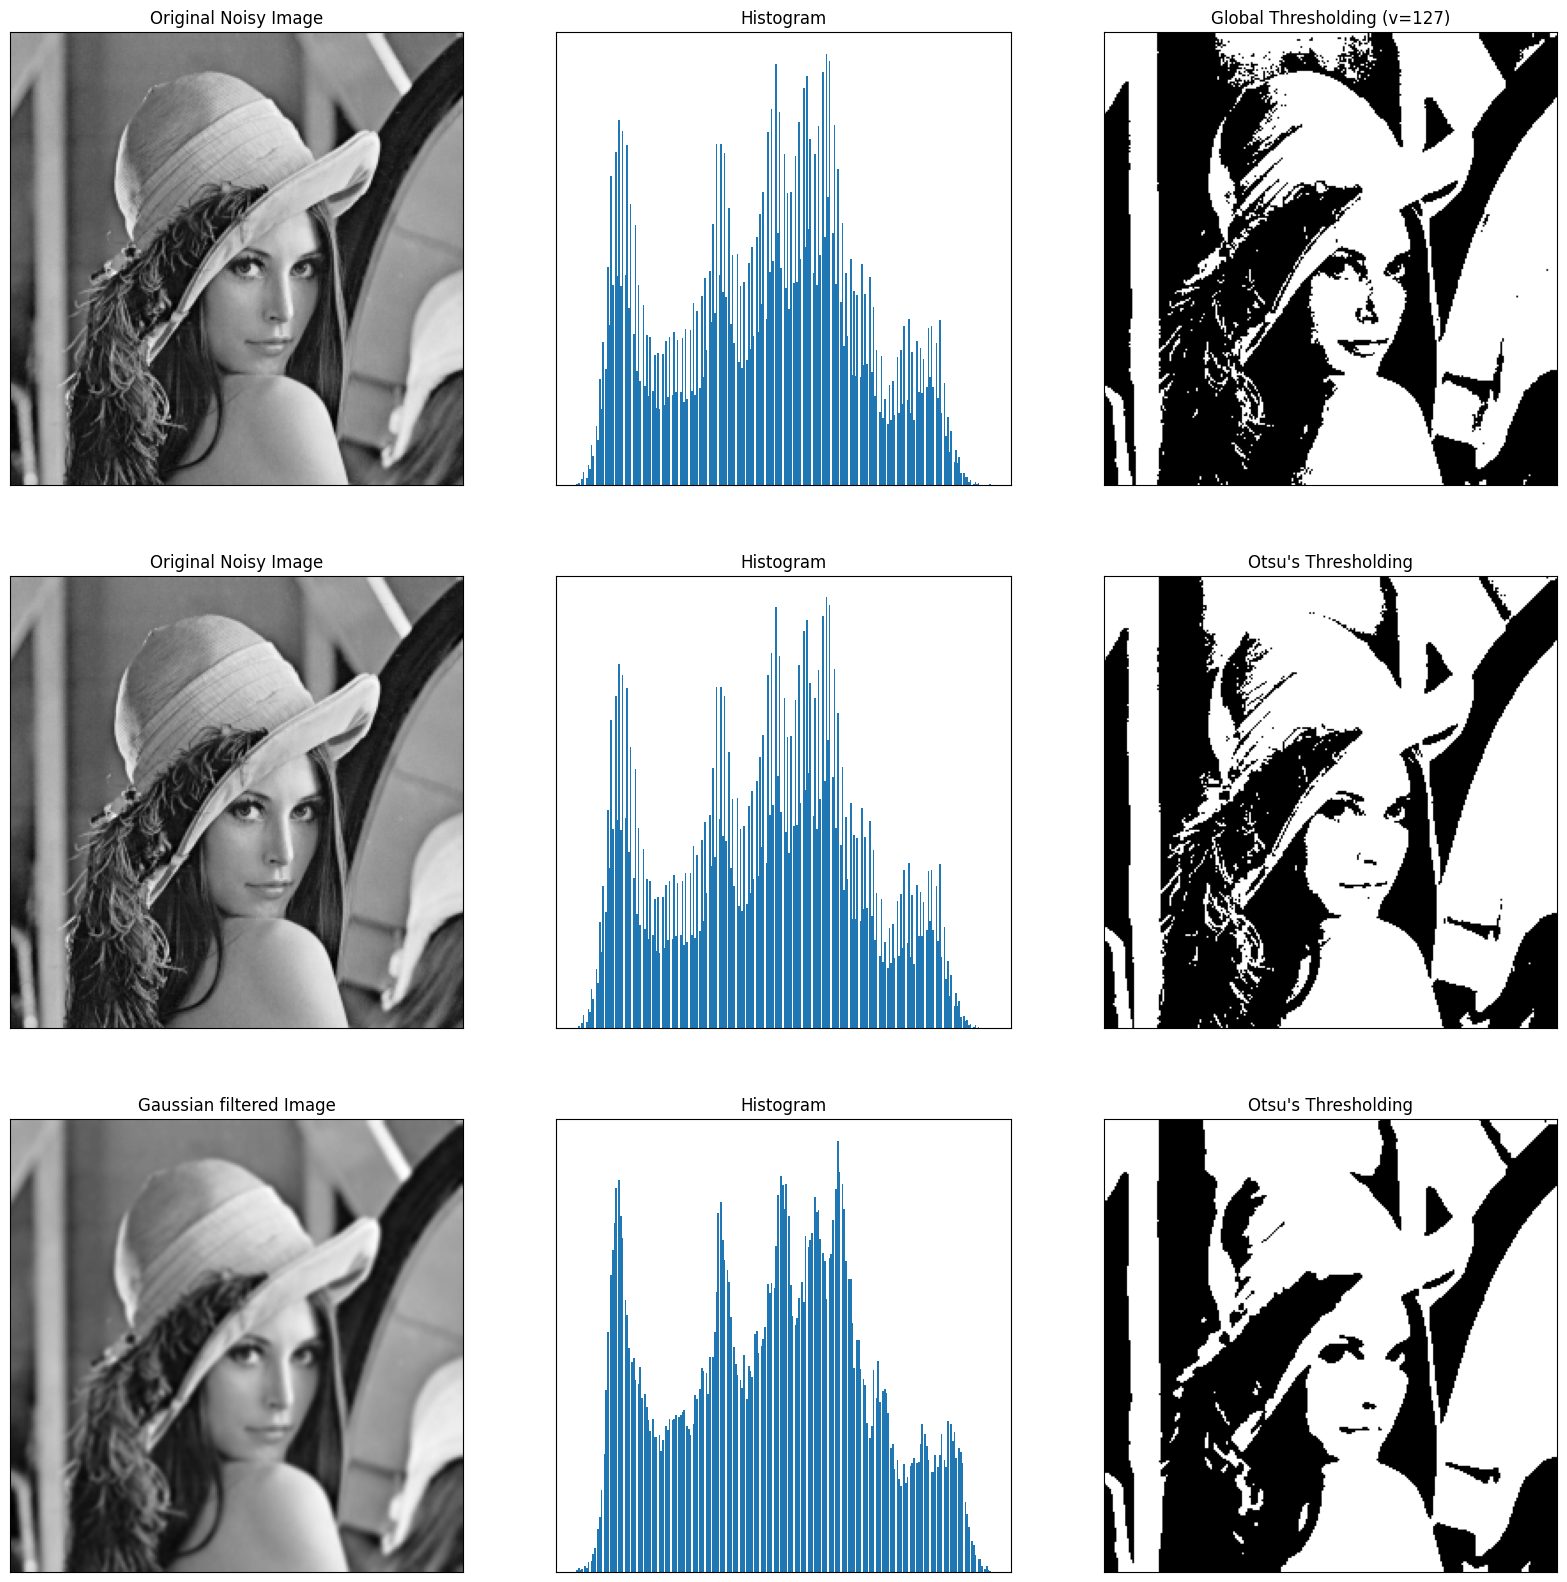

In [15]:
plt.figure(figsize=(20, 20))
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()